<a href="https://colab.research.google.com/github/Charmiladubala/AML-ASSINMENT-/blob/main/AML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib

# Set the dataset path
new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

train_dir = new_base_dir / "train"
val_dir = new_base_dir / "validation"
test_dir = new_base_dir / "test"


In [ ]:
import os

print("Train Samples:", len(os.listdir(train_dir / "cats")) + len(os.listdir(train_dir / "dogs")))
print("Validation Samples:", len(os.listdir(val_dir / "cats")) + len(os.listdir(val_dir / "dogs")))
print("Test Samples:", len(os.listdir(test_dir / "cats")) + len(os.listdir(test_dir / "dogs")))


Train Samples: 2000
Validation Samples: 1000
Test Samples: 1000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Image size & batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for Validation & Test Sets
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load Validation Data
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load Test Data
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 690s 11s/step - accuracy: 0.5025 - loss: 0.8433 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.5058 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5061 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.4829 - loss: 0.6935 - val_accuracy: 0.4930 - val_loss: 0.6923
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5275 - loss: 0.6976 - val_accuracy: 0.5710 - val_loss: 0.6880
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.5207 - loss: 0.6902 - val_accuracy: 0.5140 - val_loss: 0.6919
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5314 - loss: 0.6908 - val_accuracy: 0.5210 - val_loss: 0.6853
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5395 - loss: 0.6858 - val_accuracy: 0.5400 - 

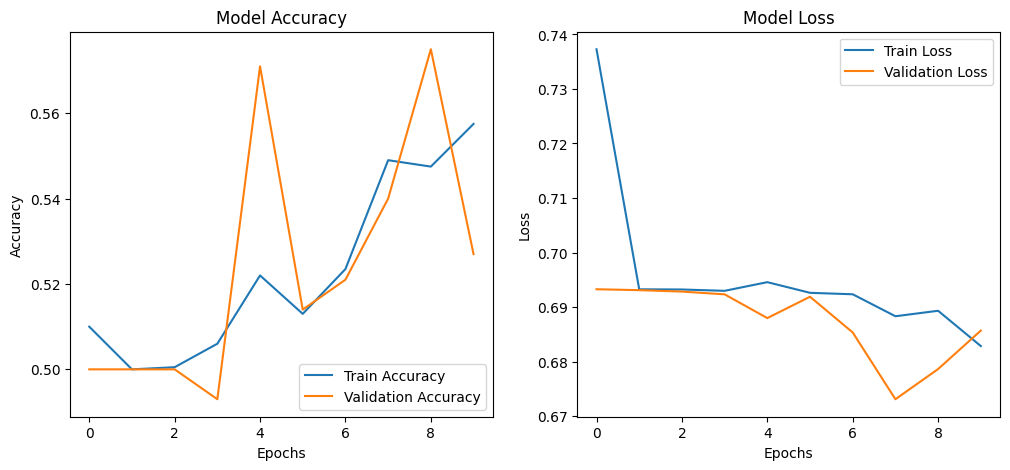

In [ ]:
import matplotlib.pyplot as plt


def plot_results(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_results(history)


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_model.h5")

In [ ]:
train_datagen_limited = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.33
)

train_generator_limited = train_datagen_limited.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

val_generator_limited = train_datagen_limited.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)


Found 1340 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
model_scratch_1000 = build_model()

history_scratch_1000 = model_scratch_1000.fit(
    train_generator_limited,
    epochs=10,
    validation_data=val_generator_limited
)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5085 - loss: 0.7448 - val_accuracy: 0.5318 - val_loss: 0.6882
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5624 - loss: 0.6788 - val_accuracy: 0.6030 - val_loss: 0.6699
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5964 - loss: 0.6566 - val_accuracy: 0.6394 - val_loss: 0.6439
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7100 - loss: 0.5981 - val_accuracy: 0.6348 - val_loss: 0.6272
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7031 - loss: 0.5810 - val_accuracy: 0.6409 - val_loss: 0.6101
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7021 - loss: 0.5370 - val_accuracy: 0.6909 - val_loss: 0.5871
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7842 - loss: 0.4814 - val_accuracy: 0.6985 - val_loss: 0.5873
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7972 - loss: 0.4447 - val_accuracy: 0.6909 - val_loss

In [ ]:
loss, accuracy = model_scratch_1000.evaluate(test_generator)
print(f"Test Accuracy (1000 Training Samples): {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.6821 - loss: 0.6276
Test Accuracy (1000 Training Samples): 0.6840


In [ ]:
train_datagen_more = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25  # 1500 train, 500 validation
)

train_generator_more = train_datagen_more.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

val_generator_more = train_datagen_more.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_scratch_1500 = build_model()

history_scratch_1500 = model_scratch_1500.fit(
    train_generator_more,
    epochs=10,
    validation_data=val_generator_more
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4909 - loss: 0.7085 - val_accuracy: 0.5640 - val_loss: 0.6718
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6206 - loss: 0.6523 - val_accuracy: 0.6660 - val_loss: 0.6330
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7038 - loss: 0.5841 - val_accuracy: 0.6700 - val_loss: 0.6050
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7665 - loss: 0.5156 - val_accuracy: 0.6980 - val_loss: 0.5873
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7504 - loss: 0.5098 - val_accuracy: 0.6860 - val_loss: 0.5950
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7988 - loss: 0.4519 - val_accuracy: 0.6620 - val_loss: 0.5922
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8175 - loss: 0.4103 - val_accuracy: 0.6900 - val_loss: 0.5741
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8703 - loss: 0.3516 - val_accuracy: 0.6760 - val_loss:

In [ ]:
loss, accuracy = model_scratch_1500.evaluate(test_generator)
print(f"Test Accuracy (1500 Training Samples): {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - accuracy: 0.6955 - loss: 0.6033
Test Accuracy (1500 Training Samples): 0.6820


In [ ]:
train_datagen_best = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator_best = train_datagen_best.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

val_generator_best = train_datagen_best.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

model_best = build_model()

history_best = model_best.fit(
    train_generator_best,
    epochs=10,
    validation_data=val_generator_best
)

loss, accuracy = model_best.evaluate(test_generator)
print(f"Test Accuracy (Optimal Training Size): {accuracy:.4f}")


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5173 - loss: 0.7067 - val_accuracy: 0.5950 - val_loss: 0.6828
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6590 - loss: 0.6594 - val_accuracy: 0.6600 - val_loss: 0.6389
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.7071 - loss: 0.5869 - val_accuracy: 0.5850 - val_loss: 0.6954
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7127 - loss: 0.5454 - val_accuracy: 0.7050 - val_loss: 0.6166
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.7872 - loss: 0.4695 - val_accuracy: 0.7000 - val_loss: 0.6198
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8046 - loss: 0.4414 - val_accuracy: 0.6600 - val_loss: 0.6563
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7984 - loss: 0.4240 - val_accuracy: 0.7200 - val_loss: 0.6119
Epoch 8/10
57/57 ━━━━━━━━━━━

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load Pretrained Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Add Custom Classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model_pretrained = Model(inputs=base_model.input, outputs=x)

# Compile Model
model_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_pretrained.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_pretrained_1000 = model_pretrained.fit(
    train_generator_limited,
    epochs=10,
    validation_data=val_generator_limited
)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 484s 12s/step - accuracy: 0.6708 - loss: 1.0488 - val_accuracy: 0.8742 - val_loss: 0.2992
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 481s 12s/step - accuracy: 0.8903 - loss: 0.2571 - val_accuracy: 0.8909 - val_loss: 0.2764
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 525s 13s/step - accuracy: 0.8998 - loss: 0.2283 - val_accuracy: 0.9091 - val_loss: 0.2525
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 528s 13s/step - accuracy: 0.9364 - loss: 0.1779 - val_accuracy: 0.8970 - val_loss: 0.2487
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 484s 12s/step - accuracy: 0.9573 - loss: 0.1358 - val_accuracy: 0.8591 - val_loss: 0.3131
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 487s 12s/step - accuracy: 0.9589 - loss: 0.1166 - val_accuracy: 0.8924 - val_loss: 0.2840
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 482s 12s/step - accuracy: 0.9692 - loss: 0.1021 - val_accuracy: 0.9045 - val_loss: 0.2690
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 482s 12s/step - accuracy: 0.9686 - loss: 0.0904 - val_accuracy: 0.

In [ ]:
loss, accuracy = model_pretrained.evaluate(test_generator)
print(f"Test Accuracy (Pretrained, 1000 Training Samples): {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 242s 8s/step - accuracy: 0.8890 - loss: 0.3118
Test Accuracy (Pretrained, 1000 Training Samples): 0.8840


In [ ]:
history_pretrained_1500 = model_pretrained.fit(
    train_generator_more,
    epochs=10,
    validation_data=val_generator_more
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 486s 10s/step - accuracy: 0.9796 - loss: 0.0756 - val_accuracy: 0.9060 - val_loss: 0.2760
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 482s 10s/step - accuracy: 0.9723 - loss: 0.0715 - val_accuracy: 0.8900 - val_loss: 0.2554
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 483s 10s/step - accuracy: 0.9716 - loss: 0.0686 - val_accuracy: 0.9060 - val_loss: 0.2635
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 504s 11s/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.8820 - val_loss: 0.2862
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 488s 10s/step - accuracy: 0.9932 - loss: 0.0351 - val_accuracy: 0.9040 - val_loss: 0.2754
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 478s 10s/step - accuracy: 0.9928 - loss: 0.0295 - val_accuracy: 0.8860 - val_loss: 0.3002
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 480s 10s/step - accuracy: 0.9947 - loss: 0.0217 - val_accuracy: 0.9060 - val_loss: 0.2915
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 503s 11s/step - accuracy: 0.9982 - loss: 0.0169 - val_accuracy: 0.

In [ ]:
loss, accuracy = model_pretrained.evaluate(test_generator)
print(f"Test Accuracy (Pretrained, 1500 Training Samples): {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.8640 - loss: 0.4889
Test Accuracy (Pretrained, 1500 Training Samples): 0.8840


In [ ]:
import pandas as pd


_, accuracy_scratch_2000 = model.evaluate(test_generator)
_, accuracy_scratch_1000 = model_scratch_1000.evaluate(test_generator)
_, accuracy_scratch_1500 = model_scratch_1500.evaluate(test_generator)
_, accuracy_best = model_best.evaluate(test_generator)
_, accuracy_pretrained_1000 = model_pretrained.evaluate(test_generator)
_, accuracy_pretrained_1500 = model_pretrained.evaluate(test_generator)


results = pd.DataFrame({
    "Model": ["Scratch (2000)","Scratch (1000)", "Scratch (1500)", "Optimal Scratch",
              "Pretrained (1000)", "Pretrained (1500)"],
     "Test Accuracy": [f"{accuracy_scratch_2000 * 100:.2f}%",f"{accuracy_scratch_1000 * 100:.2f}%",
                      f"{accuracy_scratch_1500 * 100:.2f}%",
                      f"{accuracy_best * 100:.2f}%",
                      f"{accuracy_pretrained_1000 * 100:.2f}%",
                      f"{accuracy_pretrained_1500 * 100:.2f}%"]
})


print(results)




32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - accuracy: 0.5045 - loss: 0.6942
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 589ms/step - accuracy: 0.6827 - loss: 0.6288
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 546ms/step - accuracy: 0.6665 - loss: 0.6551
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - accuracy: 0.7004 - loss: 0.6361
32/32 ━━━━━━━━━━━━━━━━━━━━ 240s 7s/step - accuracy: 0.8662 - loss: 0.4713
32/32 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.8899 - loss: 0.3787
               Model Test Accuracy
0     Scratch (2000)        51.60%
1     Scratch (1000)        68.40%
2     Scratch (1500)        68.20%
3    Optimal Scratch        69.40%
4  Pretrained (1000)        88.40%
5  Pretrained (1500)        88.40%


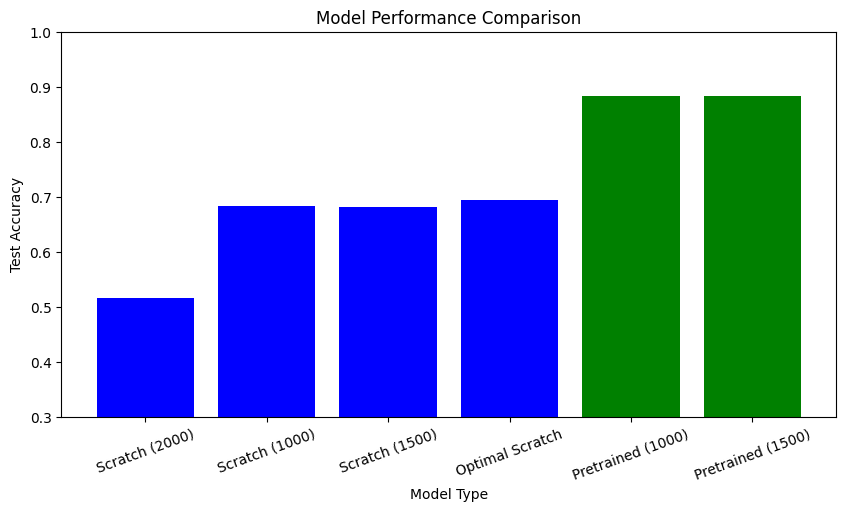

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(results["Model"], results["Test Accuracy"], color=['blue','blue', 'blue', 'blue', 'green', 'green'])
plt.xlabel("Model Type")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.3, 1.0)
plt.xticks(rotation=20)
plt.show()
